# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

<b><i>The dataset includes information about individual clients, such as age, job type, and credit default status, among other features. The target variable is whether or not the client will subscribe to a deposit with fewer calls to make, and the goal is to build a model that can predict it based on the available features. The Portuguese banking institution data is well-suited for ML classification tasks, as it has many features and a binary target variable, making it an ideal candidate for testing and comparing different ML algorithms.</b></i>

In [141]:
#Read data 
import pandas as pd
import numpy as np

#plotting library 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Encoding and Transformation 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 

#Split dataset
from sklearn.model_selection import train_test_split, GridSearchCV

#baseline classifier
from sklearn.dummy import DummyClassifier

#Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Time

import time
from datetime import datetime as dt

#Validation of model 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/mma0812/Downloads/module_17_starter/data/bank-additional-full.csv', sep = ';')

In [201]:
df_short = pd.read_csv('/Users/mma0812/Downloads/module_17_starter/data/bank-additional.csv', sep = ';')
df_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# It's always good to perform analysis on the copy of the data. 

df1 = df.copy()

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### 3.1 Find the correlation of the features

In [6]:
df1.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:>

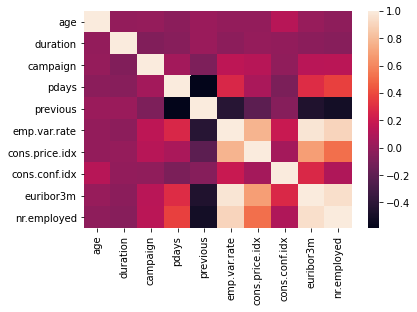

In [7]:
# heatmap of correlation matrix
corr = df1.corr()

sns.heatmap(corr)

### 3.2 Find missing value

In [8]:
df.isnull().sum(axis = 0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 3.3 Plot Boxplot to understand the signifance of outliers 

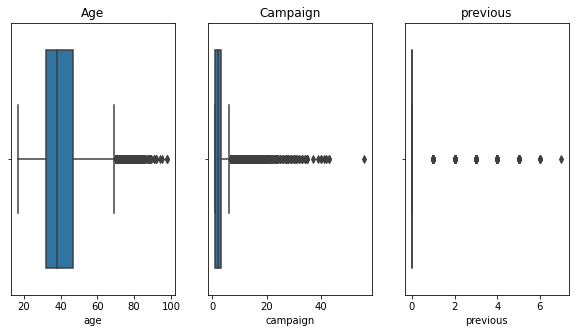

In [9]:
# Using Seaborn that's built on top of matplotlib 

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 5)

sns.boxplot(x=df1['age'], ax=axes[0])
axes[0].set_title('Age')

sns.boxplot(x=df1['campaign'], ax=axes[1])
axes[1].set_title('Campaign')

sns.boxplot(x=df1['previous'], ax=axes[2])
axes[2].set_title('previous')

plt.show()

#### Observation
* There aren't any outlier to consider.

### 3.4 Distribution of other features

In [10]:
# Let's segreate the categorical and continuous columns to better understand the distribution 

print('Distribution of continuous columns')
df1.describe() # continous columns 

Distribution of continuous columns


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


* Except columns pdays and previous rest looks pretty well distributed. 

In [11]:
print('Distribution of categorical columns')
df1.describe(include='object')

#Categorical columns look pretty neat. 

Distribution of categorical columns


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [12]:
continuous_features = df1.describe().columns
categorical_features = df1.describe(include=["object"]).columns 

# 10 categorical columns excluding the dependent variable. 

In [13]:
type(categorical_features)

pandas.core.indexes.base.Index

In [33]:
continuous_features

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

#### Plot Categorical columns

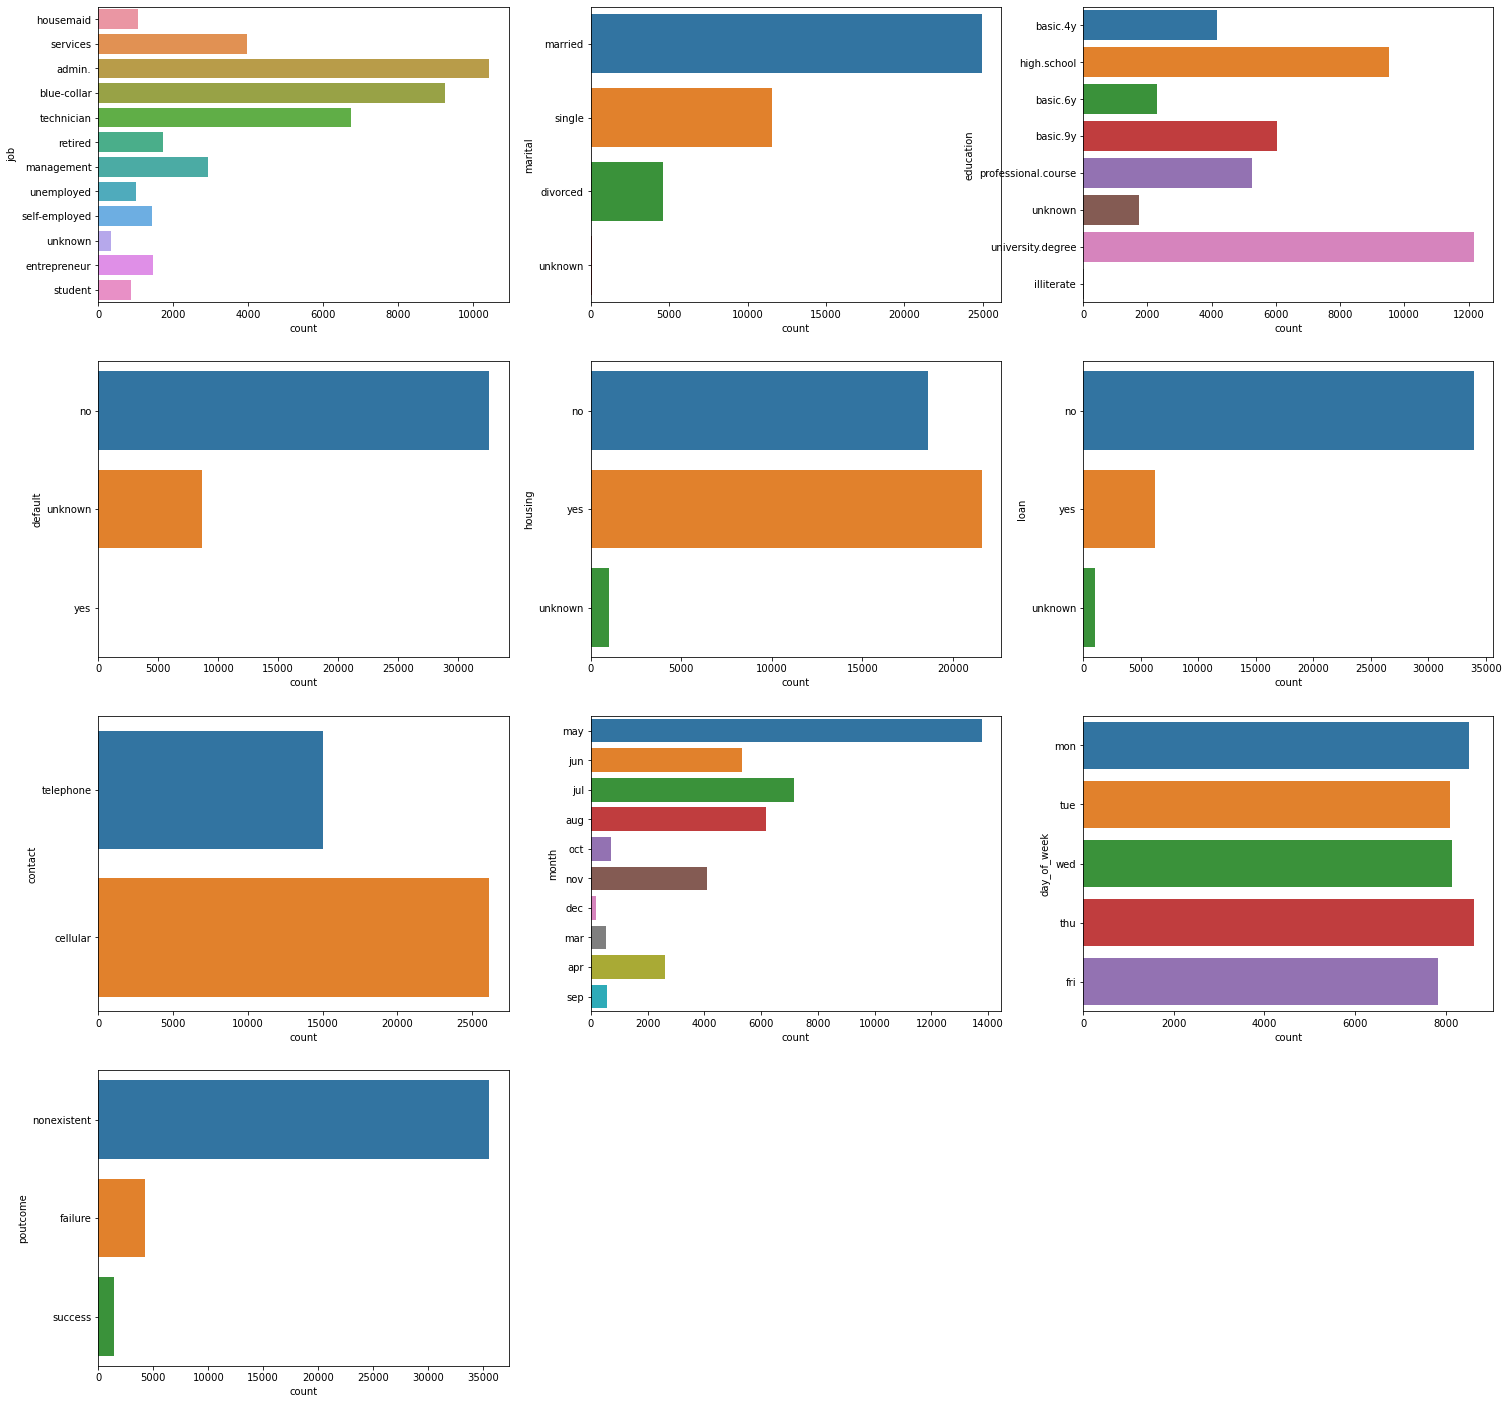

In [14]:
fig, axes = plt.subplots(4, 3, figsize=(25, 25))

for i, ax in enumerate(axes.ravel()):
    if i > 9:    # the code is checking if i > 9 is to make sure that the loop only iterates over the first 10 elements of the categorical_features list.
        ax.set_visible(False) # the code is setting the visibility of the current subplot (ax) to False if i > 9. This means that the subplot will not be visible when the plot is displayed.
        continue
    sns.countplot(y = categorical_features[i], data=df1, ax=ax)

##### Observation
* seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars
* Analyzing the plot reveals the entry of the "unknown,"  which could be analogous to null values, meaning it doesn't have any significance. 
* The graphs' format could be better, so we will consider it a future enhancement.

#### Plot Continuous columns

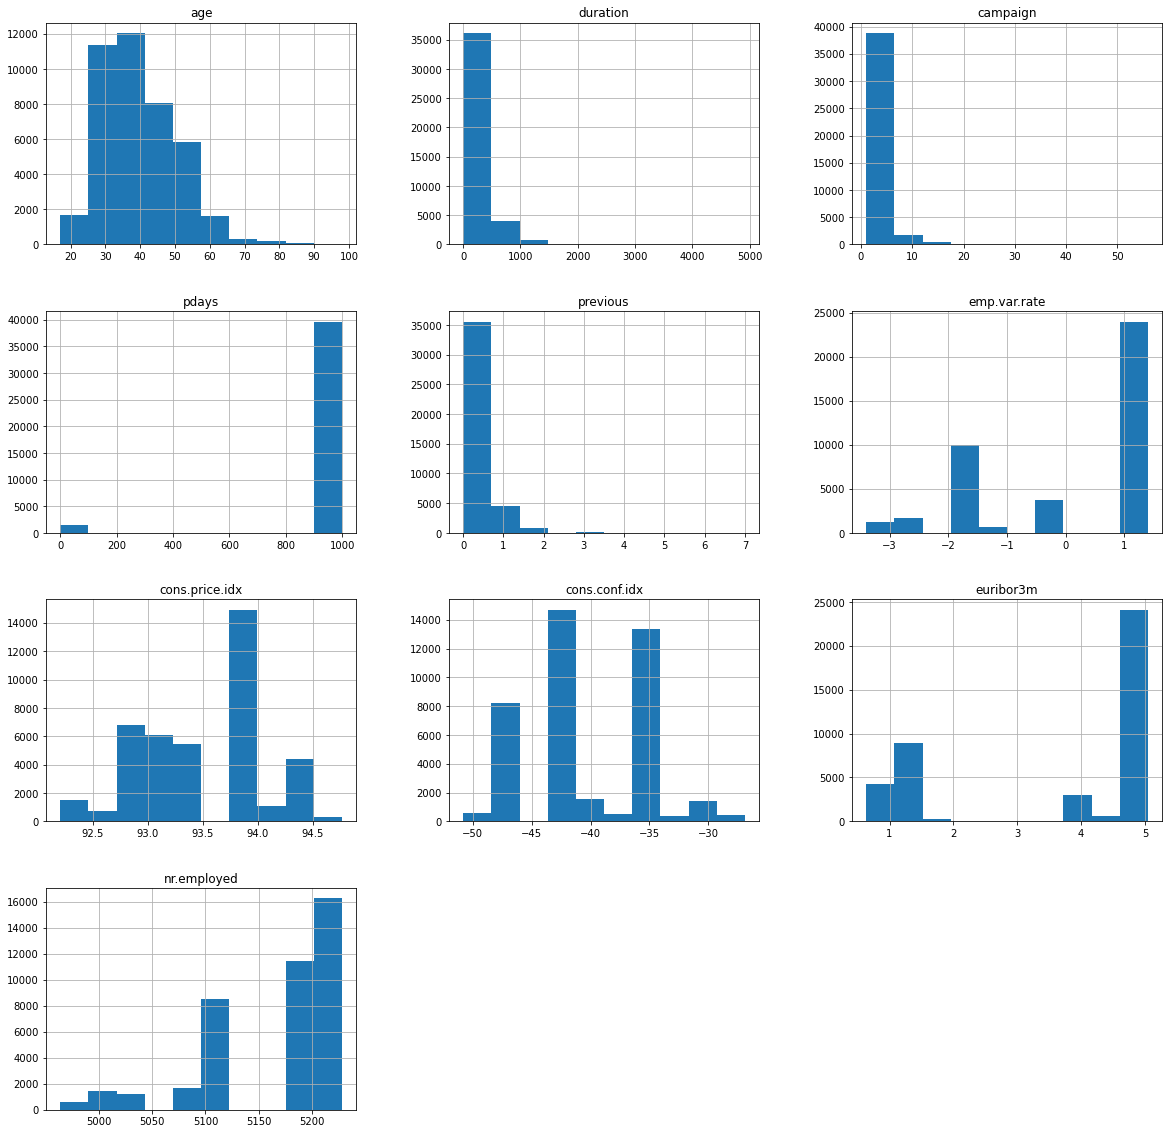

In [15]:
dist = df1.hist(column=continuous_features, figsize = (20,20))

* The continuous/numeric columns are not on the same scale so we will have transform is before building the model.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [21]:
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

### 5.1 Remove "unknown" values
* The distribution of values "unknown" seems less except in the column "default," so it seems safe to delete the entry. For the column "default," we will find a different way. 

In [17]:
# unknown_rows = df1[df1.isin(["unknown"]).any(axis=1)]
# categorical_features_df = unknown_rows[categorical_features]
# display(categorical_features_df)
#df.loc[(df['job'] == "unknown") | (df['marital'] == "unknown") | 
 #      (df['education'] == "unknown") | (df['default'] == "unknown"), categorical_features]
#df.loc[df[['job', 'marital', 'education', 'default']].isin(["unknown"]).any(axis=1), categorical_features]

#df[categorical_features]

df_remunkown = df.loc[(df['job'] != "unknown") & (df['marital'] != "unknown") & (df['education'] != "unknown")  
             & (df['default'] != "unknown") & (df['housing'] != "unknown") ]


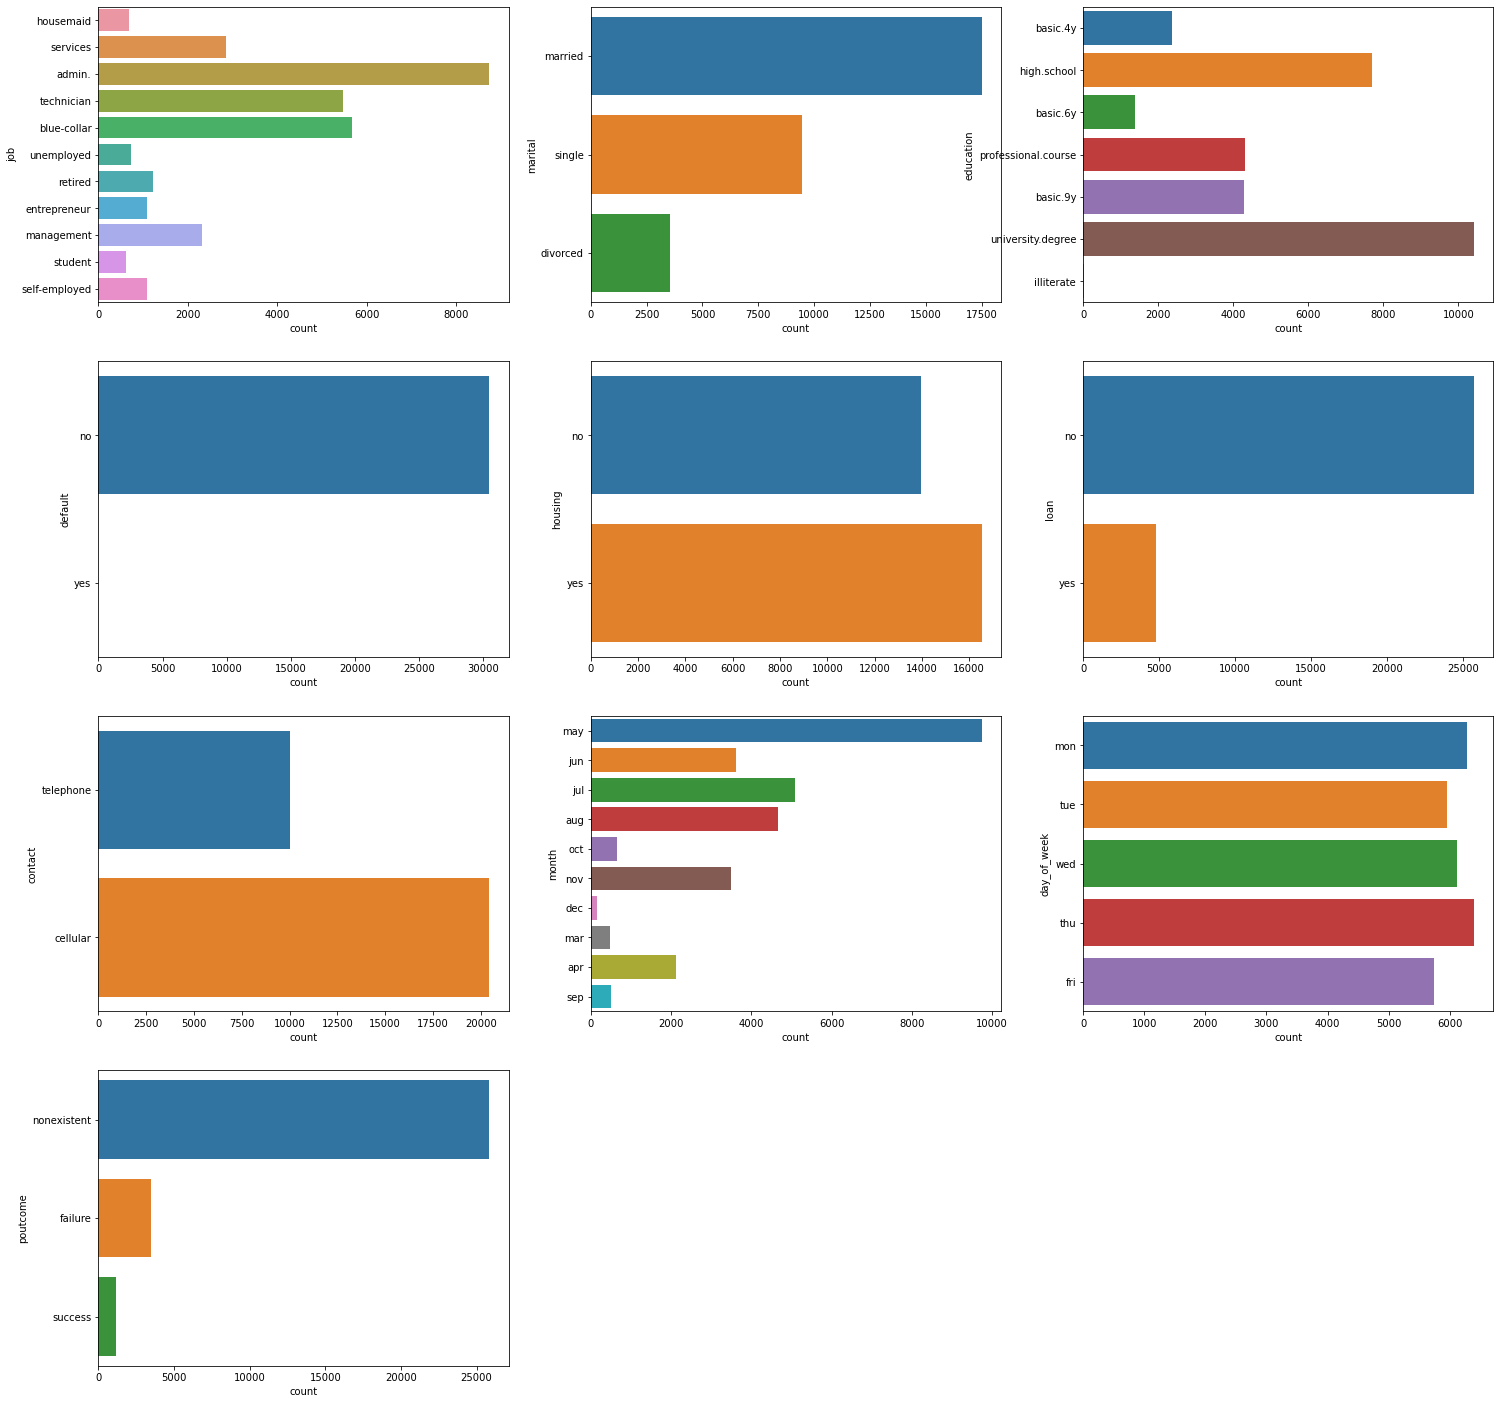

In [18]:
fig, axes = plt.subplots(4, 3, figsize=(25, 25))

for i, ax in enumerate(axes.ravel()):
    if i > 9:    # the code is checking if i > 9 is to make sure that the loop only iterates over the first 10 elements of the categorical_features list.
        ax.set_visible(False) # the code is setting the visibility of the current subplot (ax) to False if i > 9. This means that the subplot will not be visible when the plot is displayed.
        continue
    sns.countplot(y = categorical_features[i], data=df_remunkown, ax=ax)

* There are no "unknown" in the data as evident in the graph. 

In [20]:
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

### 5.2 Use One-hot Encoding to convert categorical variables to numerical variables 

In [28]:
# Filter out the categorical features
categorical_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
categorical_data = df_remunkown[categorical_features]

# Use the pandas get_dummies function to convert the categorical variables to one-hot encoded variables
encoded_data = pd.get_dummies(categorical_data)

# Concatenate the one-hot encoded variables back onto the original data
encoded_data_final = pd.concat([df_remunkown, encoded_data], axis=1)

# Drop the original categorical variables from the data
encoded_data_final = encoded_data_final.drop(categorical_features, axis=1)
encoded_data_final.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


### 5.3 Transformation of dataset

* Standardization scales the data to have a mean of 0 and a standard deviation of 1. It is achieved by subtracting the mean of the feature and dividing it by the standard deviation of the feature. 
* Normalization scales the data to be in the range of 0,1. This is done by subtracting the minimum value of the feature and dividing by the range of the feature.
* Some models, like K-nearest neighbor and Logistic regression models, are sensitive to the scale of the features and can lead to inaccurate prediction if features are on a different scale, , so normalization may be beneficial
* Algorithms such as logistic regression assume that the features are on a similar scale, so standardization may be more appropriate.


In [39]:
# Create the first pipeline using the StandardScaler
preprocessor_pipeline_std = ColumnTransformer( transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

#Create the second pipeline using MinMixScaler
preprocessor_pipeline_norm = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

preprocessor_pipeline_std, preprocessor_pipeline_norm


(ColumnTransformer(transformers=[('num', StandardScaler(),
                                  Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'duration',
        'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays', 'previous'],
       dtype='object')),
                                 ('cat', OneHotEncoder(),
                                  ['job', 'marital', 'education', 'default',
                                   'housing', 'loan', 'contact', 'month',
                                   'day_of_week', 'poutcome'])]),
 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                  Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'duration',
        'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays', 'previous'],
       dtype='object')),
                                 ('cat', OneHotEncoder(),
                                  ['job', 'marital', 'education', 'default',
                                   'housing', 'loan', 'contact

* <i><b> Encoding is performed by both the methods to keep the steps handy. We will use pipeline method in the subsequent steps, not the steps in 5.2 </i></b>

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [44]:
X = df_remunkown.drop("y", axis=1)
y = df_remunkown["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### 7.1 Baseline performance of Standarization

In [195]:
# Use Dummyclassifer from sklearn that makes random prediction based on the given condition. 
start = time.time()

baseline_pipe = Pipeline([('preprocess_std', preprocessor_pipeline_std),
                         ('baseline_classifier', DummyClassifier(strategy="most_frequent"))])
baseline_pipe.fit(X_train, y_train)
baseline_pipe_score = baseline_pipe.score(X_train, y_train)

end = time.time()
time_taken = end - start

print("A Baseline performance:", baseline_pipe_score)
print("Time in seconds:", time_taken, "seconds")
print("Test score: ", baseline_pipe.score(X_test, y_test))

A Baseline performance: 0.874138981303594
Time in seconds: 0.5952258110046387 seconds
Test score:  0.8717612331912102


### 7.2 Baseline performance of Normalization

In [196]:
# Use Dummyclassifer from sklearn that makes random prediction based on the given condition. 
start = time.time()

baseline_pipe_n = Pipeline([('preprocess_norm', preprocessor_pipeline_norm),
                         ('baseline_classifier', DummyClassifier(strategy="most_frequent"))])
baseline_pipe_n.fit(X_train, y_train)
baseline_pipe_score_n = baseline_pipe_n.score(X_train, y_train)

end = time.time()
time_taken = end - start

print("A Baseline performance:", baseline_pipe_score)
print("Time in seconds:", time_taken, "seconds")
print("Test score: ", baseline_pipe_n.score(X_test, y_test))

A Baseline performance: 0.874138981303594
Time in seconds: 0.1962130069732666 seconds
Test score:  0.8717612331912102


* I assumed that the two transformations would yield different performance scores, but that's not the case. Let's take that it's because the dummyclassifier is just looking for the "y" so whether data is transformed doesn't matter. 

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### 8.1 Logistic Regression

In [73]:
# Construct pipeline using preprocessor and LogisticRegression
start = time.time()
logistic_regression = Pipeline([('preprocess', preprocessor_pipeline_std),
                               ('lgr', LogisticRegression(max_iter=1000))])
logistic_regression.fit(X_train, y_train)
baseline_pipe_score_lr = logistic_regression.score(X_train, y_train)

end = time.time()
time_taken = end - start

print("Model Score:", baseline_pipe_score_lr)
print("Time in seconds:", time_taken, "seconds")

Model Score: 0.9004732674195212
Time in seconds: 0.5996439456939697 seconds


In [79]:
import warnings
warnings.filterwarnings("ignore")

#### 8.1.1 Logistic Regression on Standarize data

In [197]:
# Construct the Logistic Regression using GridSearchCV to find the best combination of the parameters
# param_grid = {'penalty': ['l1', 'l2'],
#               'C': [0.001, 0.01, 0.1, 1, 10, 100],
#               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
#               'max_iter': [100, 200, 300, 400, 500],
#               'class_weight': [None, 'balanced']}
start = time.time()
logistic_regression_grid = Pipeline([('preprocess', preprocessor_pipeline_std),
                               ('lgr', LogisticRegression())])
param_grid = {'lgr__penalty': ['l2', None, 'l1'],
             'lgr__max_iter': [100, 200, 300, 400, 500],
             'lgr__solver': ['lbfgs', 'liblinear'],
             'lgr__C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_lgr = GridSearchCV(logistic_regression_grid, param_grid, cv=5)
grid_search_lgr.fit(X_train, y_train)

end = time.time()
time_taken = end - start

print("Best parameters of LogisticRegression: ", grid_search_lgr.best_params_)
print("Best score of LogisticRegression: ", grid_search_lgr.best_score_)
print("Test score: ", grid_search_lgr.score(X_test, y_test))
print("Time in seconds:", time_taken, "seconds")

Best parameters of LogisticRegression:  {'lgr__C': 1, 'lgr__max_iter': 100, 'lgr__penalty': 'l1', 'lgr__solver': 'liblinear'}
Best score of LogisticRegression:  0.8994892341926704
Test score:  0.9007324805947305
Time in seconds: 219.47395396232605 seconds


#### 8.1.2 Logistic Regression on Normalized data

In [198]:
# Construct the Logistic Regression using GridSearchCV to find the best combination of the parameters using Normalization
start = time.time()
logistic_regression_grid_norm = Pipeline([('preprocess', preprocessor_pipeline_norm),
                               ('lgr', LogisticRegression())])
param_grid = {'lgr__penalty': ['l2', None, 'l1'],
             'lgr__max_iter': [100, 200, 300, 400, 500],
             'lgr__solver': ['lbfgs', 'liblinear'],
             'lgr__C': [0.001, 0.01, 0.1, 1, 10]}

grid_search_lgr_norm = GridSearchCV(logistic_regression_grid_norm, param_grid, cv=5)
grid_search_lgr_norm.fit(X_train, y_train)

end = time.time()
time_taken = end - start

print("Best parameters of LogisticRegression: ", grid_search_lgr_norm.best_params_)
print("Best score of LogisticRegression: ", grid_search_lgr_norm.best_score_)
print("Time in seconds:", time_taken, "seconds")
print("Test score: ", grid_search_lgr_norm.score(X_test, y_test))


Best parameters of LogisticRegression:  {'lgr__C': 1, 'lgr__max_iter': 200, 'lgr__penalty': 'l1', 'lgr__solver': 'liblinear'}
Best score of LogisticRegression:  0.8993018366756875
Time in seconds: 140.39847207069397 seconds
Test score:  0.901388433366131


### 8.2 KNN 

#### 8.2.1 KNN with Normalization

In [90]:
start = time.time()

#Create the pipeline using Normalized data 
knn_grid_norm = Pipeline([('preprocess', preprocessor_pipeline_norm),
                         ('knn', KNeighborsClassifier())
                         ])

# Define parameter grid
param_grid_knn = {'knn__n_neighbors': [5, 10, 15, 20],
                 'knn__weights': ['uniform', 'distance'],
                 'knn__p':[1, 2]
                 }
#Create Gridsearch Object
grid_search_knn_norm = GridSearchCV(knn_grid_norm, param_grid_knn, cv=5)

# Fit the KNN model on training data
grid_search_knn_norm.fit(X_train, y_train)

end = time.time()
time_taken = end - start
print("Time in seconds:", time_taken, "seconds")
print("Best parameters of LogisticRegression: ", grid_search_knn_norm.best_params_)
print("Best score of LogisticRegression: ", grid_search_knn_norm.best_score_)
print("Test score: ", grid_search_knn_norm.score(X_test, y_test))

Time in seconds: 219.49962306022644 seconds
Best parameters of LogisticRegression:  {'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'uniform'}
Best score of LogisticRegression:  0.8874937294498842
Test score:  0.8846616376954193


#### 8.2.2 KNN with Standarization

In [ ]:
start = time.time()

#Create the pipeline using Standarized data 
knn_grid_std = Pipeline([('preprocess', preprocessor_pipeline_std),
                         ('knn', KNeighborsClassifier())
                         ])

# Define parameter grid
param_grid_knn_std = {'knn__n_neighbors': [5, 10, 15, 20],
                 'knn__weights': ['uniform', 'distance'],
                 'knn__p':[1, 2]
                 }
#Create Gridsearch Object
grid_search_knn_norm = GridSearchCV(knn_grid_std, param_grid_knn_std, cv=5)

# Fit the KNN model on training data
grid_search_knn_norm.fit(X_train, y_train)

end = time.time()
time_taken = end - start


In [114]:
print("Time in seconds:", time_taken, "seconds")
print("Best parameters of LogisticRegression: ", grid_search_knn_norm.best_params_)
print("Best score of LogisticRegression: ", grid_search_knn_norm.best_score_)
print("Test score: ", grid_search_knn_norm.score(X_test, y_test))

Time in seconds: 225.04505896568298 seconds
Best parameters of LogisticRegression:  {'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'uniform'}
Best score of LogisticRegression:  0.8962561769721031
Test score:  0.8923144200284246


In [127]:
y_pred = grid_search_knn_norm.predict(X_test)

# Generate report 
class_report = classification_report(y_test, y_pred)
print("Classification Report: ")
print(class_report)

Classification Report: 
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7974
         yes       0.63      0.38      0.47      1173

    accuracy                           0.89      9147
   macro avg       0.77      0.67      0.71      9147
weighted avg       0.88      0.89      0.88      9147



In [ ]:
# Make predictions on test data
y_pred = grid_search_knn_norm.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix of KNN model with Normalization")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### 8.2.3 KNN with Normalization default setting. No gridsearch

In [152]:
start = time.time()

knn = knn_grid_norm.fit(X_train, y_train)

end = time.time()
time_taken = end - start
print("Time in seconds:", time_taken, "seconds")
print("Train score: ", knn.score(X_train, y_train))
print("Test score: ", knn.score(X_test, y_test))

Time in seconds: 0.14859604835510254 seconds
Train score:  0.9074551333114662
Test score:  0.8788673882147152


### 8.3 Decision Trees

* DecisionTree Classifier of Sklearn is not senstive to the scale of the features, so transformation may not make noticeable difference. Therefore, I plan to experiment with and w/o transformation to see which works best. 

#### 8.3.1 With Standarization 

In [131]:
start = time.time()

#Create the pipeline using Normalized data 
tree_grid_norm = Pipeline([('preprocess', preprocessor_pipeline_std),
                         ('dtree', DecisionTreeClassifier())
                         ])

# Define parameter grid
param_grid_tree = {'dtree__criterion': ['gini','entropy'],
                 'dtree__splitter': ['best', 'random'],
                 'dtree__min_samples_split':[2, 5, 7, 10, 15],
                   'dtree__max_depth':[None, 5, 10, 15]
                 }
#Create Gridsearch Object
grid_search_tree_std = GridSearchCV(tree_grid_norm, param_grid_tree, cv=5)

# Fit the DecisionTree model on training data
grid_search_tree_std.fit(X_train, y_train)

end = time.time()
time_taken = end - start
print("Time in seconds:", time_taken, "seconds")
print("Best parameters of DecisionTree with Standarization: ", grid_search_tree_std.best_params_)
print("Best score of DecisionTree with Standarization: ", grid_search_tree_std.best_score_)
print("Test score of DecisionTree with Standarization: ", grid_search_tree_std.score(X_test, y_test))

Time in seconds: 60.70226812362671 seconds
Best parameters of DecisionTree with Standarization:  {'dtree__criterion': 'entropy', 'dtree__max_depth': 5, 'dtree__min_samples_split': 5, 'dtree__splitter': 'best'}
Best score of DecisionTree with Standarization:  0.9036596522125135
Test score of DecisionTree with Standarization:  0.907073357384935


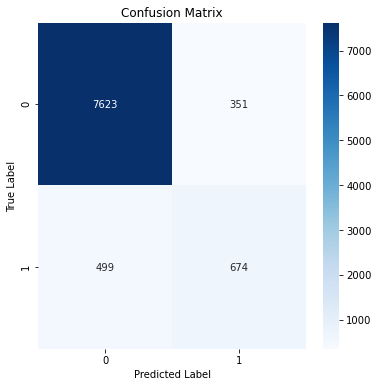

In [135]:
# Make predictions on test data
y_pred_dtree = grid_search_tree_std.predict(X_test)

# Calculate confusion matrix
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#### 8.3.2 Without Standarization

In [136]:
# Create new transformer with only onehotencoder. 
preprocessor_pipeline_onehot = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [139]:
start = time.time()

#Create the pipeline using Normalized data 
tree_grid = Pipeline([('onehot', preprocessor_pipeline_onehot),
                      ('dtree', DecisionTreeClassifier())
                         ])

# Define parameter grid
param_grid_tree = {'dtree__criterion': ['gini','entropy'],
                 'dtree__splitter': ['best', 'random'],
                 'dtree__min_samples_split':[2, 5, 7, 10, 15],
                   'dtree__max_depth':[None, 5, 10, 15]
                 }
#Create Gridsearch Object
grid_search_tree = GridSearchCV(tree_grid, param_grid_tree, cv=5)

# Fit the DecisionTree model on training data
grid_search_tree.fit(X_train, y_train)

end = time.time()
time_taken = end - start
print("Time in seconds:", time_taken, "seconds")
print("Best parameters of DecisionTree: ", grid_search_tree.best_params_)
print("Best score of DecisionTree: ", grid_search_tree.best_score_)
print("Test score of DecisionTree: ", grid_search_tree.score(X_test, y_test))

Time in seconds: 67.87834286689758 seconds
Best parameters of DecisionTree:  {'dtree__criterion': 'entropy', 'dtree__max_depth': 5, 'dtree__min_samples_split': 7, 'dtree__splitter': 'random'}
Best score of DecisionTree:  0.8859471510901262
Test score of DecisionTree:  0.8817098502241172


* Without Scaling model performed relatively close to the baseline score of 87.4, as highlighted in 7.2 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

y_pred = grid_search_tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %.3f' % roc_auc)

ROC AUC: 0.710


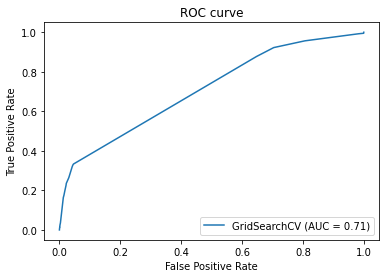

In [168]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

y_pred = grid_search_tree.predict_proba(X_test)[:, 1]
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plot_roc_curve(grid_search_tree.fit(X_train, y_train), X_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

print('ROC AUC: %.3f' % roc_auc)

### 8.4 Support Vector Machine

* It is advised to scale the data before building the SVM model. 
* It is also recommended to check for the correlation of data before constructing the SVM model as it can lead to multicolinearity in the model. The multicolineartity in the model can cause unstable estimates of the coefficients and increase the variance of model. Resulting in overfitting. 
    * The Kernel trick can address the multicolinearity. 
* Lets build the model with and without Kernel trick to see the difference. 

#### 8.4.1 SVM without Kernel Trick and with Standarization

In [ ]:
start = time.time()

#Create the pipeline using Normalized data 
svm_grid_std = Pipeline([('preprocess', preprocessor_pipeline_std),
                         ('svm', SVC())
                         ])

# Define parameter grid
param_grid_tree = {'svm__C': [0.1, 1, 10, 100],
                 'svm__gamma': [0.1, 1, 10, 100]
                 }
#Create Gridsearch Object
grid_search_svm_std = GridSearchCV(svm_grid_std, param_grid_tree, cv=5)

# Fit the DecisionTree model on training data
grid_search_svm_std.fit(X_train, y_train)

end = time.time()
time_taken = end - start
print("Time in seconds:", time_taken, "seconds")
print("Best parameters of SVM with Standarization: ", grid_search_svm_std.best_params_)
print("Best score of SVM with Standarization: ", grid_search_svm_std.best_score_)
print("Test score of SVM with Standarization: ", grid_search_svm_std.score(X_test, y_test))

* The first run with grid parameters of below ran over 20 minutes without yielding the result so I had to interupt the kernel. 
```
param_grid_tree = {'svm__C': [0.1, 1, 10, 100],
                 'svm__gamma': [0.1, 1, 10, 100]
                 }
```

#### 8.4.2 SVM With KernelTrick and Standaization

In [ ]:
start = time.time()

#Create the pipeline using Normalized data 
svm_grid_std_kernel = Pipeline([('preprocess', preprocessor_pipeline_std),
                         ('svm', SVC())
                         ])

# Define parameter grid
param_grid_tree_kernel = {'svm__C': [0.1, 1, 10],
                 'svm__gamma': [0.1, 1, 10],
                 'svm__kernel': ['linear', 'poly', 'rbf']
                 }
#Create Gridsearch Object
grid_search_svm_std_kernel = GridSearchCV(svm_grid_std_kernel, param_grid_tree_kernel, n_jobs=-1)

# Fit the SVM model on training data
grid_search_svm_std_kernel.fit(X_train, y_train)

end = time.time()
time_taken = end - start
print("Time in seconds:", time_taken, "seconds")
print("Best parameters of SVM with Kernel & Standarization: ", grid_search_svm_std_kernel.best_params_)
print("Best score of SVM with Kernel & Standarization: ", grid_search_svm_std_kernel.best_score_)
print("Test score of SVM with Kernel & Standarization: ", grid_search_svm_std_kernel.score(X_test, y_test))

* The second run with below grid parameters ran over 25 minutes without yielding the result so I had to interupt the kernel.
```
param_grid_tree_kernel = {'svm__C': [0.1, 1, 10],
                 'svm__gamma': [0.1, 1, 10],
                 'svm__kernel': ['linear', 'poly', 'rbf']
                 }
```

* Now, I plan to run SVM without Gridsearch. 

#### 8.4.3 SVM without Gridsearch

In [147]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [144]:
# Create SVM model
svm_grid_std_kernel = Pipeline([('preprocess', preprocessor_pipeline_std),
                         ('svm', SVC())
                         ])

# Fit the SVM model on training data
svm_model = svm_grid_std_kernel.fit(X_train, y_train)

end = time.time()
time_taken = end - start
print("Time in seconds:", time_taken, "seconds")
#print("Best parameters of SVM with Kernel & Standarization: ", grid_search_svm_std_kernel.best_params_)
#print("Best score of SVM with Kernel & Standarization: ", grid_search_svm_std_kernel.best_score_)
#print("Test score of SVM with Kernel & Standarization: ", grid_search_svm_std_kernel.score(X_test, y_test))

Time in seconds: 4113.002244710922 seconds


In [149]:
# Make predictions on test data
y_pred_svm_no_grid = svm_model.predict(X_test)

#Print Scores
print("Test score of SVM with Kernel & Standarization: ", svm_model.score(X_test, y_test))
print("Accuracy Test score of SVM with Kernel & Standarization: ", accuracy_score(y_test, predictions))

Test score of SVM with Kernel & Standarization:  0.89996720236143
Accuracy Test score of SVM with Kernel & Standarization:  0.89996720236143


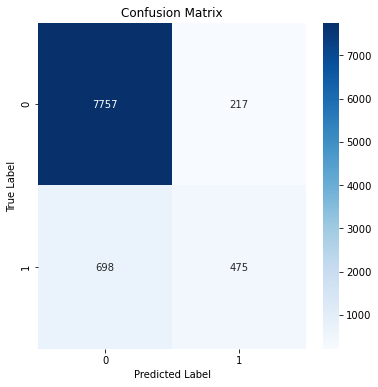

In [150]:
# Calculate confusion matrix
cm_svm_no_grid = confusion_matrix(y_test, y_pred_svm_no_grid)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm_no_grid, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

<b><i>The aim of this project was to enhance the efficacy of the bank's telemarketing drive, which was achieved by utilizing data analysis, visualization techniques, and constructing analytical models. To this end, a specific customer profile was defined, and classification and regression models were created to forecast customers' reactions to the term deposit initiative.

The DecisionTree model seems to be most accurate in terms of both Train and Test accuracy of 90%.</b></i>

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [202]:
model_comp = pd.DataFrame({
                          'Models': ['Baseline_w_standard', 'LogisticRegression_w_standard', 'KNN_w_standard', 
                                     'Decision Tree_w_standard', 'SVD_w_standard', 
                                    'Baseline_w_normalization', 'LogisticRegression_w_normalization', 'KNN_w_normalization', 
                                     'Decision Tree_w_normalization', 'SVD_w_normalization'], 
                          'Train Time (sec)': ['0.595', '219.47', '225.04', '60.70', '21 mins', '0.874', '140.398', '219.499', '67.87', '22 mins'],
                          'Train Accuracy': ['0.874', '0.899', '0.896', '0.903', 'no_result', '0.874', '0.899' , '0.887', '0.885', 'no_result'],
                          'Test Accuracy': ['0.871', '0.900', '0.892', '0.907', 'no_result', '0.871', '0.901', '0.884', '0.881', 'no_result']
}).set_index('Models')
model_comp

,Train Time (sec),Train Accuracy,Test Accuracy
Models,,,
Baseline_w_standard,0.595,0.874,0.871
LogisticRegression_w_standard,219.47,0.899,0.900
KNN_w_standard,225.04,0.896,0.892
Decision Tree_w_standard,60.70,0.903,0.907
SVD_w_standard,21 mins,no_result,no_result
Baseline_w_normalization,0.874,0.874,0.871
LogisticRegression_w_normalization,140.398,0.899,0.901
KNN_w_normalization,219.499,0.887,0.884
Decision Tree_w_normalization,67.87,0.885,0.881


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

* Improve the graphs by enabling better annotations. 
* Elaborate univariate analysis for understanding the distribution of each feature separately. 
* Perform PCA to understand the relationship of features better. 
* SVM model didn't finish due to the enormous amount of data. But we can use the subset of the banking data to run SVM. 
    * However, it will be interesting to see whether the data is evenly distributed.
* Gridsearch CV is used to tune the parameters of the model. However, there is a possibility of fine-tuning further.
* The more I understand the data, the better I can tune the models. 
* Each classification model can be further explored using the ROC curve to understand the accuracy better. I added a few ROC curves, but I have yet to explain them in detail.
* There is a scope of reducing the lines of code using custom user functions. 

### References 
* https://www.hummingbirdpubng.com/wp-content/uploads/2020/07/HUJASD_VOL17_NO7_127-142.pdf
* https://github.com/yfsui/Bank-Telemarketing-ML-Project
* https://medium.com/@shuv.sdr/random-forest-classification-in-python-36c0893eefb7